**Abstraction:**<br>
The NSL-KDD data set is not the first of its kind. The KDD cup was an International Knowledge Discovery and Data Mining Tools Competition. In 1999, this competition was held with the goal of collecting traffic records. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between “bad’’ connections, called intrusions or attacks, and “good’’ normal connections. As a result of this competition, a mass amount of internet traffic records were collected and bundled into a data set called the KDD’99, and from this, the NSL-KDD data set was brought into existence, as a revised, cleaned-up version of the KDD’99 from the University of New Brunswick

**Steps:**
- Importing needed libraries.
- Read data files.
- explore data and data describe.
- Make data preprocessing include cleaning data from missing and duplicate values.
- Split data into numerical and categorical data.
- Visualize data according to its type.
- Encode categorical data to convert it to numeric one to help model identify them.
- Split data into features & target data and also split data into train & test data.
- Data scaling for makes it easy for a model to learn and understand the problem with variables with same values range.
- Resampling for balance imbalanced data.
- Validation phase: Train model by splitting Train data in train and test (validation) data to validate models performance by predict it with test (validation) data before final model test.
- Final phase: Train Model on original train data and predict on original test data for final test and export predictions on csv files.

# Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime as dt
# Turn off the warnings.
warnings.filterwarnings(action='ignore')

# set plot theme
# sns.set_theme(style="darkgrid")

# EDA

## Read Data Files

In [2]:
Train = pd.read_csv('kdd_train.csv')
Test = pd.read_csv('kdd_test.csv')

In [3]:
Train.head(10)

ID  duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0   7060         0           tcp      smtp   SF       1129        327     0   
1  22036         0           tcp      http   SF        242       2147     0   
2  19555         0           tcp      http   SF        299       3991     0   
3  11393         0           udp  domain_u   SF         43        133     0   
4  22783         0           tcp    telnet   S0          0          0     0   
5  18285         0           tcp    supdup   S0          0          0     0   
6  20046         0           udp   private   SF         28          0     0   
7  16853         0           tcp   private   S0          0          0     0   
8  10898         0           tcp      http   SF        307       8792     0   
9    533         0           tcp  ftp_data   SF        252          0     0   

   wrong_fragment  urgent  ...  dst_host_same_srv_rate  \
0               0       0  ...                    1.00   
1               0       0  ...                    1.00   
2               0       0  ...                    1.00   
3               0       0  ...                    1.00   
4               0       0  ...                    0.14   
5               0       0  ...                    0.05   
6               3       0  ...                    0.36   
7               0       0  ...                    0.04   
8               0       0  ...                    1.00   
9               0       0  ...                    0.04   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.00                         0.14   
1                    0.00                         0.00   
2                    0.00                         0.00   
3                    0.01                         0.00   
4                    0.19                         0.05   
5                    0.07                         0.00   
6                    0.64                         0.36   
7                    0.08                         0.00   
8                    0.00                         0.04   
9                    0.02                         0.04   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.02                  0.00   
1                         0.00                  0.00   
2                         0.00                  0.00   
3                         0.00                  0.00   
4                         0.00                  0.10   
5                         0.00                  1.00   
6                         0.00                  0.09   
7                         0.00                  1.00   
8                         0.08                  0.00   
9                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.04                  0.00                      0.01   
1                      0.00                  0.00                      0.00   
2                      0.00                  0.00                      0.00   
3                      0.00                  0.00                      0.00   
4                      0.67                  0.00                      0.00   
5                      1.00                  0.00                      0.00   
6                      0.00                  0.55                      0.00   
7                      1.00                  0.00                      0.00   
8                      0.00                  0.00                      0.02   
9                      0.00                  0.83                      0.00   

   level  Class  
0     21      0  
1     21      0  
2     21      0  
3     21      0  
4      4      0  
5     18      1  
6     18      1  
7     21      1  
8     21      0  
9     17      0  

[10 rows x 44 columns]

In [4]:
Test.head(10)

ID  duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0  15831         0           tcp      http  REJ          0          0     0   
1  12617         0           tcp  ftp_data   SF        151          0     0   
2  16328         0           udp  domain_u   SF         44        139     0   
3  11403         0           tcp      http   SF        251       4014     0   
4  11891         0           tcp      smtp   SF       1317        367     0   
5  21506         0           tcp     pop_3   SF         38        130     0   
6   6611      1031           udp     other   SF        146        105     0   
7   3350         0           tcp    telnet   S0          0          0     0   
8  19356         0           tcp  ftp_data   SF         59          0     0   
9   1807         0           tcp      http   SF        286        874     0   

   wrong_fragment  urgent  ...  dst_host_srv_count  dst_host_same_srv_rate  \
0               0       0  ...                 236                    1.00   
1               0       0  ...                  37                    0.33   
2               0       0  ...                 255                    1.00   
3               0       0  ...                 255                    1.00   
4               0       0  ...                 166                    0.80   
5               0       0  ...                   4                    0.02   
6               0       0  ...                   3                    0.01   
7               0       0  ...                   5                    0.02   
8               0       0  ...                 111                    0.44   
9               0       0  ...                 255                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.00                         0.09   
1                    0.07                         0.33   
2                    0.00                         0.00   
3                    0.00                         0.00   
4                    0.40                         0.20   
5                    0.05                         0.01   
6                    0.60                         0.93   
7                    0.07                         0.01   
8                    0.02                         0.44   
9                    0.00                         0.01   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.01                  0.00   
1                         0.05                  0.00   
2                         0.00                  0.00   
3                         0.01                  0.00   
4                         0.02                  0.00   
5                         0.50                  0.00   
6                         0.00                  0.00   
7                         0.00                  1.00   
8                         0.00                  0.00   
9                         0.02                  0.01   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  1.00                      0.07   
1                      0.00                  0.00                      0.00   
2                      0.00                  0.00                      0.00   
3                      0.00                  0.00                      0.00   
4                      0.00                  0.00                      0.00   
5                      0.00                  0.01                      0.00   
6                      0.00                  0.00                      0.00   
7                      1.00                  0.00                      0.00   
8                      0.00                  0.00                      0.00   
9                      0.01                  0.00                      0.00   

   level  
0     21  
1     20  
2     21  
3     21  
4     21  
5     20  
6     21  
7     19  
8     20  
9     21  

[10 rows x 43 columns]

## Explore Data

**Data Shape**

In [5]:
print(f"Train.shape = {Train.shape}")
print(f"Test.shape = {Test.shape}")

Train.shape = (17251, 44)
Test.shape = (5751, 43)


**Data Describtion**

In [6]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17251 entries, 0 to 17250
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           17251 non-null  int64  
 1   duration                     17251 non-null  int64  
 2   protocol_type                17251 non-null  object 
 3   service                      17251 non-null  object 
 4   flag                         17251 non-null  object 
 5   src_bytes                    17251 non-null  int64  
 6   dst_bytes                    17251 non-null  int64  
 7   land                         17251 non-null  int64  
 8   wrong_fragment               17251 non-null  int64  
 9   urgent                       17251 non-null  int64  
 10  hot                          17251 non-null  int64  
 11  num_failed_logins            17251 non-null  int64  
 12  logged_in                    17251 non-null  int64  
 13  num_compromised 

In [7]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           5751 non-null   int64  
 1   duration                     5751 non-null   int64  
 2   protocol_type                5751 non-null   object 
 3   service                      5751 non-null   object 
 4   flag                         5751 non-null   object 
 5   src_bytes                    5751 non-null   int64  
 6   dst_bytes                    5751 non-null   int64  
 7   land                         5751 non-null   int64  
 8   wrong_fragment               5751 non-null   int64  
 9   urgent                       5751 non-null   int64  
 10  hot                          5751 non-null   int64  
 11  num_failed_logins            5751 non-null   int64  
 12  logged_in                    5751 non-null   int64  
 13  num_compromised   

In [8]:
Train.describe().T

count          mean           std  min  \
ID                           17251.0  11453.391977  6.632392e+03  0.0   
duration                     17251.0    300.978958  2.646008e+03  0.0   
src_bytes                    17251.0  31077.816069  2.910731e+06  0.0   
dst_bytes                    17251.0   3531.402933  9.012346e+04  0.0   
land                         17251.0      0.000116  1.076701e-02  0.0   
wrong_fragment               17251.0      0.025274  2.688656e-01  0.0   
urgent                       17251.0      0.000000  0.000000e+00  0.0   
hot                          17251.0      0.184627  2.081791e+00  0.0   
num_failed_logins            17251.0      0.001101  4.372448e-02  0.0   
logged_in                    17251.0      0.388151  4.873435e-01  0.0   
num_compromised              17251.0      0.292041  1.238613e+01  0.0   
root_shell                   17251.0      0.001333  3.649049e-02  0.0   
su_attempted                 17251.0      0.001507  5.272890e-02  0.0   
num_root                     17251.0      0.322590  1.369741e+01  0.0   
num_file_creations           17251.0      0.016695  5.927676e-01  0.0   
num_shells                   17251.0      0.000290  1.702266e-02  0.0   
num_access_files             17251.0      0.004927  1.120510e-01  0.0   
num_outbound_cmds            17251.0      0.000000  0.000000e+00  0.0   
is_host_login                17251.0      0.000000  0.000000e+00  0.0   
is_guest_login               17251.0      0.008579  9.222854e-02  0.0   
count                        17251.0     85.896122  1.147567e+02  1.0   
srv_count                    17251.0     27.461480  7.195904e+01  1.0   
serror_rate                  17251.0      0.295324  4.515936e-01  0.0   
srv_serror_rate              17251.0      0.292720  4.519649e-01  0.0   
rerror_rate                  17251.0      0.117968  3.176689e-01  0.0   
srv_rerror_rate              17251.0      0.119747  3.217848e-01  0.0   
same_srv_rate                17251.0      0.652095  4.422873e-01  0.0   
diff_srv_rate                17251.0      0.063106  1.792463e-01  0.0   
srv_diff_host_rate           17251.0      0.095276  2.567596e-01  0.0   
dst_host_count               17251.0    183.644195  9.858607e+01  0.0   
dst_host_srv_count           17251.0    113.325952  1.104229e+02  0.0   
dst_host_same_srv_rate       17251.0      0.513184  4.494226e-01  0.0   
dst_host_diff_srv_rate       17251.0      0.083868  1.892332e-01  0.0   
dst_host_same_src_port_rate  17251.0      0.147851  3.098100e-01  0.0   
dst_host_srv_diff_host_rate  17251.0      0.031412  1.094390e-01  0.0   
dst_host_serror_rate         17251.0      0.294951  4.495136e-01  0.0   
dst_host_srv_serror_rate     17251.0      0.289118  4.505702e-01  0.0   
dst_host_rerror_rate         17251.0      0.116886  3.047038e-01  0.0   
dst_host_srv_rerror_rate     17251.0      0.118235  3.167736e-01  0.0   
level                        17251.0     19.474291  2.327471e+00  0.0   
Class                        17251.0      0.478291  4.995430e-01  0.0   

                                 25%       50%       75%          max  
ID                           5720.50  11409.00  17197.50      23001.0  
duration                        0.00      0.00      0.00      42862.0  
src_bytes                       0.00     44.00    277.00  381709090.0  
dst_bytes                       0.00      0.00    492.00    5151385.0  
land                            0.00      0.00      0.00          1.0  
wrong_fragment                  0.00      0.00      0.00          3.0  
urgent                          0.00      0.00      0.00          0.0  
hot                             0.00      0.00      0.00         77.0  
num_failed_logins               0.00      0.00      0.00          4.0  
logged_in                       0.00      0.00      1.00          1.0  
num_compromised                 0.00      0.00      0.00        884.0  
root_shell                      0.00      0.00      0.00          1.0  
su_attempted                

In [9]:
Test.describe().T

count          mean            std  min  \
ID                           5751.0  11641.807686    6662.345769  1.0   
duration                     5751.0    325.848548    2845.948746  0.0   
src_bytes                    5751.0  10326.554338  191979.966284  0.0   
dst_bytes                    5751.0   3758.329160   98591.154021  0.0   
land                         5751.0      0.000000       0.000000  0.0   
wrong_fragment               5751.0      0.021214       0.243672  0.0   
urgent                       5751.0      0.000174       0.013186  0.0   
hot                          5751.0      0.242567       2.404511  0.0   
num_failed_logins            5751.0      0.001391       0.052732  0.0   
logged_in                    5751.0      0.381673       0.485839  0.0   
num_compromised              5751.0      0.048861       2.108586  0.0   
root_shell                   5751.0      0.002087       0.045636  0.0   
su_attempted                 5751.0      0.000869       0.039553  0.0   
num_root                     5751.0      0.048339       2.385848  0.0   
num_file_creations           5751.0      0.012867       0.413479  0.0   
num_shells                   5751.0      0.000522       0.022836  0.0   
num_access_files             5751.0      0.002087       0.049299  0.0   
num_outbound_cmds            5751.0      0.000000       0.000000  0.0   
is_host_login                5751.0      0.000000       0.000000  0.0   
is_guest_login               5751.0      0.010781       0.103278  0.0   
count                        5751.0     87.485829     117.357550  1.0   
srv_count                    5751.0     28.454182      74.679330  1.0   
serror_rate                  5751.0      0.289611       0.448286  0.0   
srv_serror_rate              5751.0      0.287096       0.448870  0.0   
rerror_rate                  5751.0      0.126204       0.327954  0.0   
srv_rerror_rate              5751.0      0.127366       0.330489  0.0   
same_srv_rate                5751.0      0.652095       0.440769  0.0   
diff_srv_rate                5751.0      0.064796       0.181457  0.0   
srv_diff_host_rate           5751.0      0.096133       0.257468  0.0   
dst_host_count               5751.0    183.860198      98.993120  1.0   
dst_host_srv_count           5751.0    111.997392     110.170809  1.0   
dst_host_same_srv_rate       5751.0      0.507872       0.447719  0.0   
dst_host_diff_srv_rate       5751.0      0.086406       0.191955  0.0   
dst_host_same_src_port_rate  5751.0      0.148341       0.308310  0.0   
dst_host_srv_diff_host_rate  5751.0      0.032723       0.116913  0.0   
dst_host_serror_rate         5751.0      0.288206       0.446535  0.0   
dst_host_srv_serror_rate     5751.0      0.281617       0.446816  0.0   
dst_host_rerror_rate         5751.0      0.126794       0.316052  0.0   
dst_host_srv_rerror_rate     5751.0      0.125582       0.325594  0.0   
level                        5751.0     19.446009       2.345207  0.0   

                                 25%       50%       75%        max  
ID                           5862.00  11778.00  17438.50    22998.0  
duration                        0.00      0.00      0.00    41802.0  
src_bytes                       0.00     43.00    264.00  7248552.0  
dst_bytes                       0.00      0.00    473.50  5131424.0  
land                            0.00      0.00      0.00        0.0  
wrong_fragment                  0.00      0.00      0.00        3.0  
urgent                          0.00      0.00      0.00        1.0  
hot                             0.00      0.00      0.00       30.0  
num_failed_logins               0.00      0.00      0.00        3.0  
logged_in                       0.00      0.00      1.00        1.0  
num_compromised                 0.00      0.00      0.00      157.0  
root_shell                      0.00      0.00      0.00        1.0  
su_attempted                    0.00      0.00      0.00        2.0  
num_root                        0.00      0.00      0.00

## Data Preprocessing

**Check for missing data**

In [10]:
Train.isna().any().any()

False

In [11]:
Test.isna().any().any()

False

There is no missing data

**Check for data dublicates**

In [12]:
Train.duplicated().any()

False

In [13]:
Test.duplicated().any()

False

There is no duplicated data

**Handing Outliers**

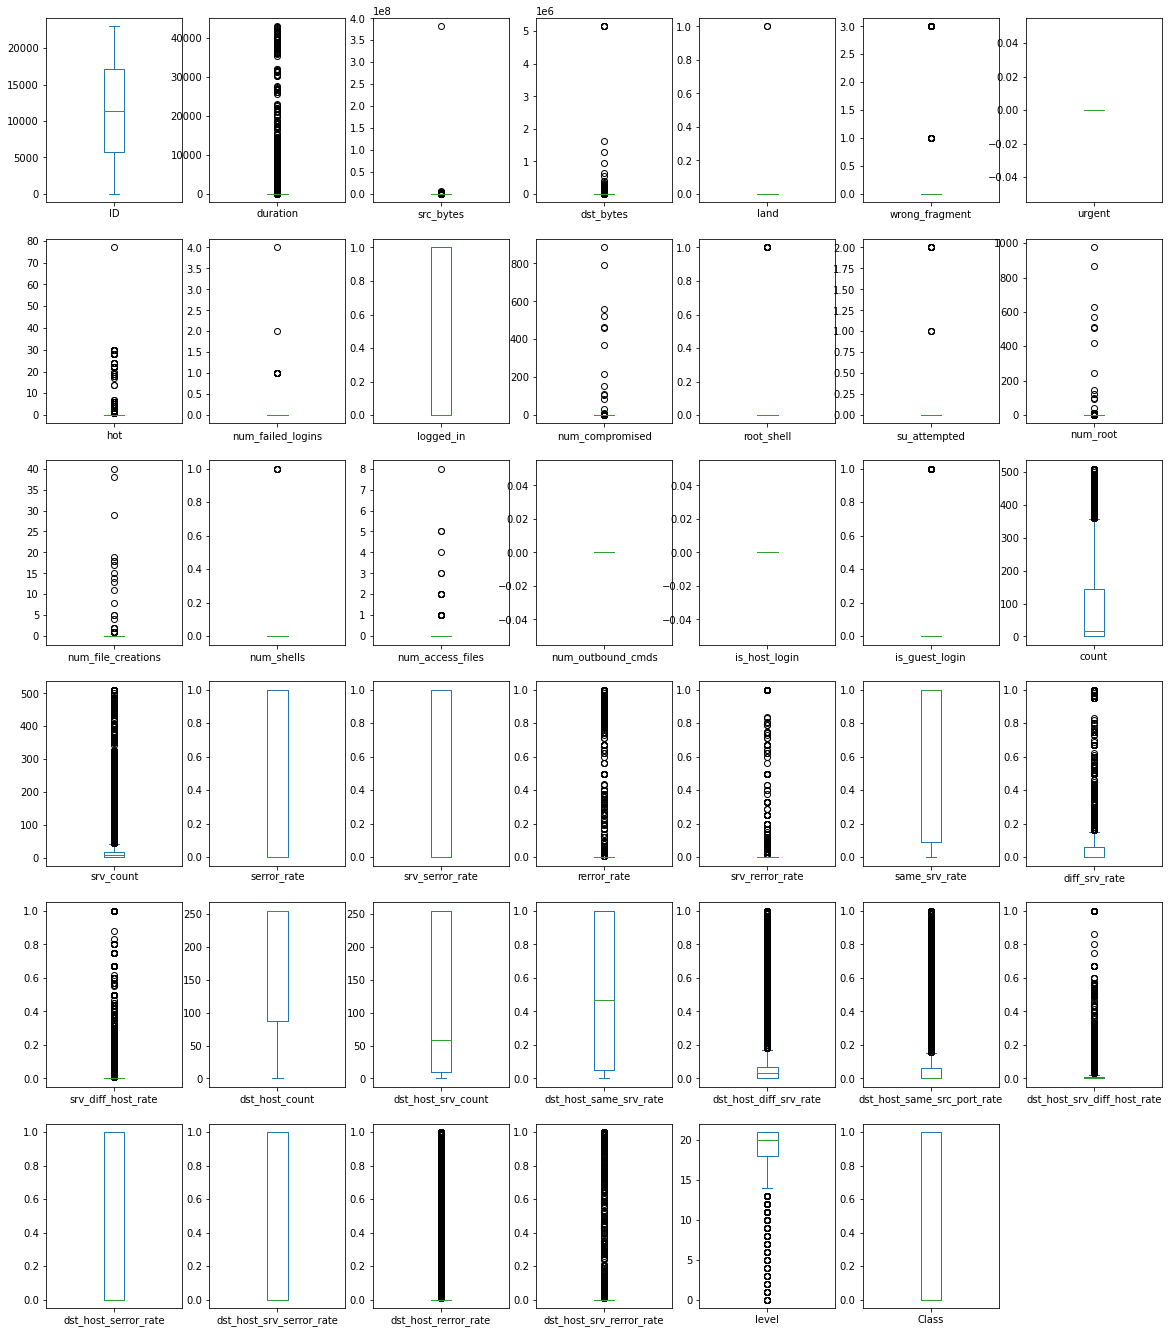

In [14]:
Train.plot(kind='box',subplots=1,layout=(10,7),figsize=(20,40));

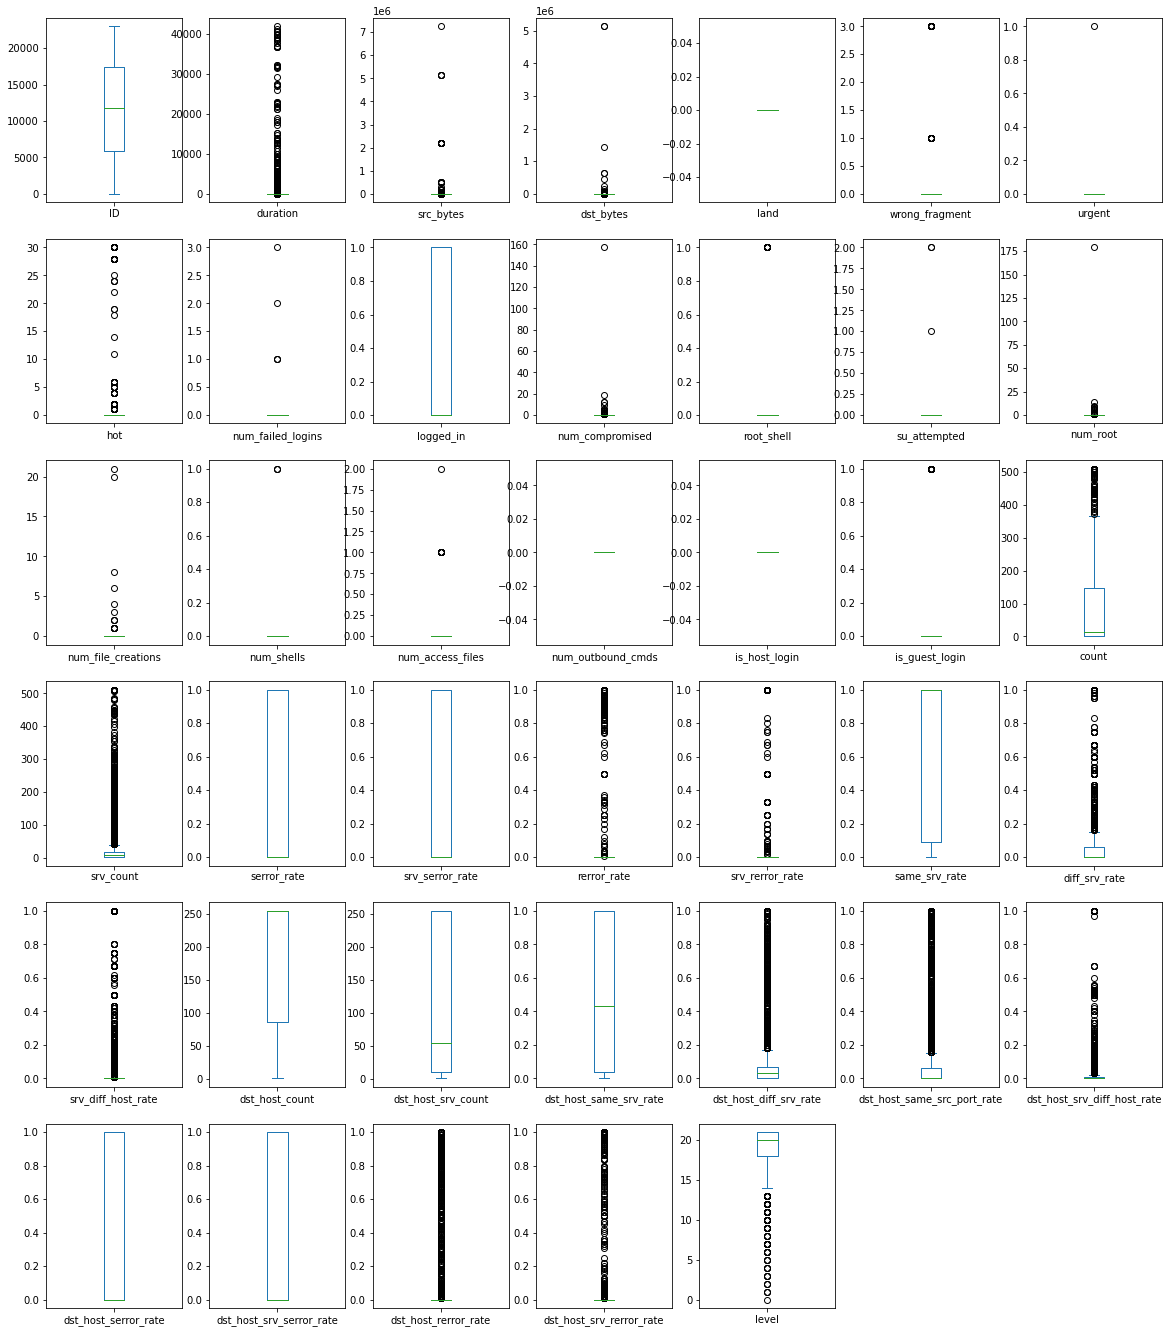

In [15]:
Test.plot(kind='box',subplots=1,layout=(10,7),figsize=(20,40));

There is no significant outliers in the data

**Checking for columns with all zeros**

In [16]:
(Train == 0).all().any()

True

In [17]:
(Test == 0).all().any()

True

We have 3 columns have all values zeros

In [18]:
(Train == 0).all().sum()

3

In [19]:
(Test == 0).all().sum()

3

Since those columns values are all zeros, so we drop them

In [20]:
Train.columns[(Train == 0).all()]

Index(['urgent', 'num_outbound_cmds', 'is_host_login'], dtype='object')

In [21]:
Test.columns[(Test == 0).all()]

Index(['land', 'num_outbound_cmds', 'is_host_login'], dtype='object')

So there is a conflict here, as there is two differecnt columns in train and test data files are zeros all, then the two columns are not actually zeros so we can't drop any of them.<br>
*We will drop the common between train and test*

In [22]:
Train.drop(['num_outbound_cmds','is_host_login'], axis = 1, inplace = True)

In [23]:
Test.drop(['num_outbound_cmds','is_host_login'], axis = 1, inplace = True)

Drop uneeded columns

In [24]:
Train.drop(['ID'], axis = 1, inplace = True)

In [25]:
Test.drop(['ID'], axis = 1, inplace = True)

**Check Unique number of values**

In [26]:
Train.nunique()

duration                        539
protocol_type                     3
service                          66
flag                             11
src_bytes                      1338
dst_bytes                      3051
land                              2
wrong_fragment                    3
urgent                            1
hot                              18
num_failed_logins                 4
logged_in                         2
num_compromised                  22
root_shell                        2
su_attempted                      3
num_root                         22
num_file_creations               16
num_shells                        2
num_access_files                  7
is_guest_login                    2
count                           442
srv_count                       382
serror_rate                      67
srv_serror_rate                  49
rerror_rate                      70
srv_rerror_rate                  38
same_srv_rate                    93
diff_srv_rate               

In [27]:
Test.nunique()

duration                        208
protocol_type                     3
service                          63
flag                             11
src_bytes                       748
dst_bytes                      1401
land                              1
wrong_fragment                    3
urgent                            2
hot                              15
num_failed_logins                 4
logged_in                         2
num_compromised                  11
root_shell                        2
su_attempted                      3
num_root                         10
num_file_creations                9
num_shells                        2
num_access_files                  3
is_guest_login                    2
count                           370
srv_count                       280
serror_rate                      46
srv_serror_rate                  30
rerror_rate                      49
srv_rerror_rate                  25
same_srv_rate                    81
diff_srv_rate               

**Split data into categorical and numerical**

In [28]:
Train.select_dtypes(include=['object']).columns.tolist()

['protocol_type', 'service', 'flag']

In [29]:
Train_categorical = Train.select_dtypes(include=['object'])

In [30]:
Train.select_dtypes(exclude=['object']).columns.tolist()

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level',
 'Class']

In [31]:
Train_numerical = Train.select_dtypes(exclude=['object'])

In [32]:
Train_categorical.nunique()

protocol_type     3
service          66
flag             11
dtype: int64

In [33]:
Train_numerical.nunique()

duration                        539
src_bytes                      1338
dst_bytes                      3051
land                              2
wrong_fragment                    3
urgent                            1
hot                              18
num_failed_logins                 4
logged_in                         2
num_compromised                  22
root_shell                        2
su_attempted                      3
num_root                         22
num_file_creations               16
num_shells                        2
num_access_files                  7
is_guest_login                    2
count                           442
srv_count                       382
serror_rate                      67
srv_serror_rate                  49
rerror_rate                      70
srv_rerror_rate                  38
same_srv_rate                    93
diff_srv_rate                    75
srv_diff_host_rate               56
dst_host_count                  256
dst_host_srv_count          

## Visualization

**Insights**

**Numerical Data Visualization**

Visualize precentage of each label in connectio type (0: not attacked, 1: attacked)

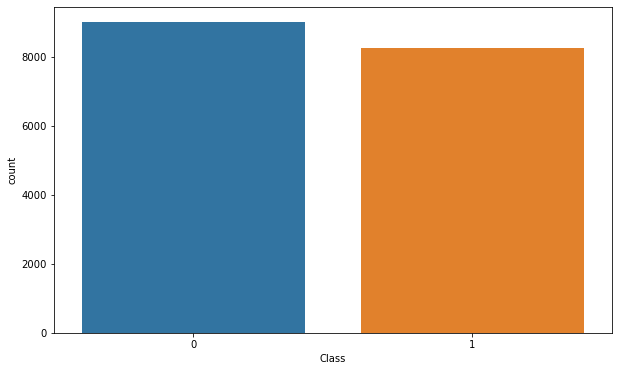

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data = Train_numerical, x = 'Class');

<AxesSubplot:ylabel='Class'>

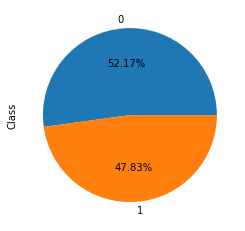

In [35]:
round(Train_numerical["Class"].value_counts()/Train_numerical.shape[0]*100,2).plot.pie(autopct="%1.2f%%")

Visualize the difficulty levels

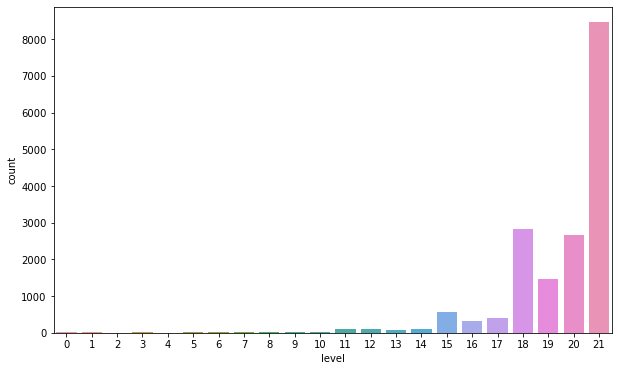

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data = Train_numerical, x = 'level');

Visualize the duration average for each label (0: not attacked, 1: attacked)

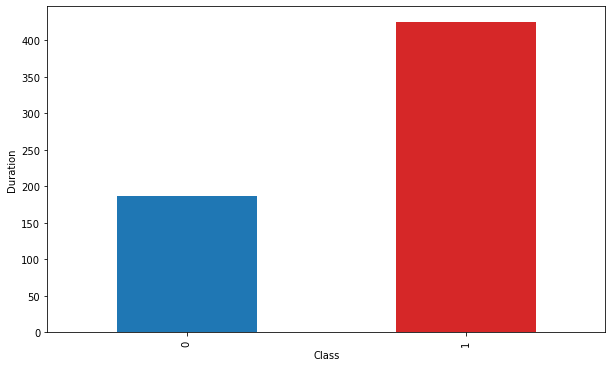

In [37]:
Train_numerical['duration'].groupby(Train_numerical['Class']).mean().plot(kind = 'bar',figsize=(10,6),
                        xlabel = 'Class', ylabel = 'Duration', color = ['tab:blue','tab:red']);

Visualize total number of wrong fragments for each label (0: not attacked, 1: attacked)

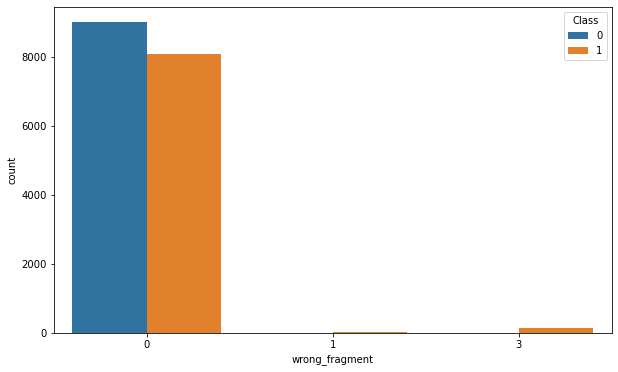

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data = Train_numerical, x = 'wrong_fragment', hue = 'Class');

**Categorical Data Visualization**

Visualize number of each protocol type

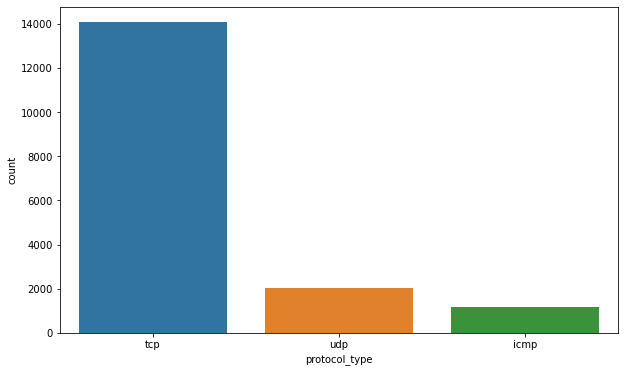

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(data = Train_categorical, x = 'protocol_type');

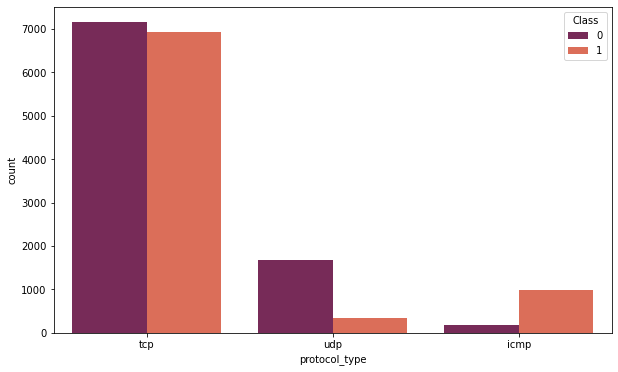

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data = Train, x = 'protocol_type', hue = 'Class', palette='rocket');

Visualize number of Destination network service methods used in connections

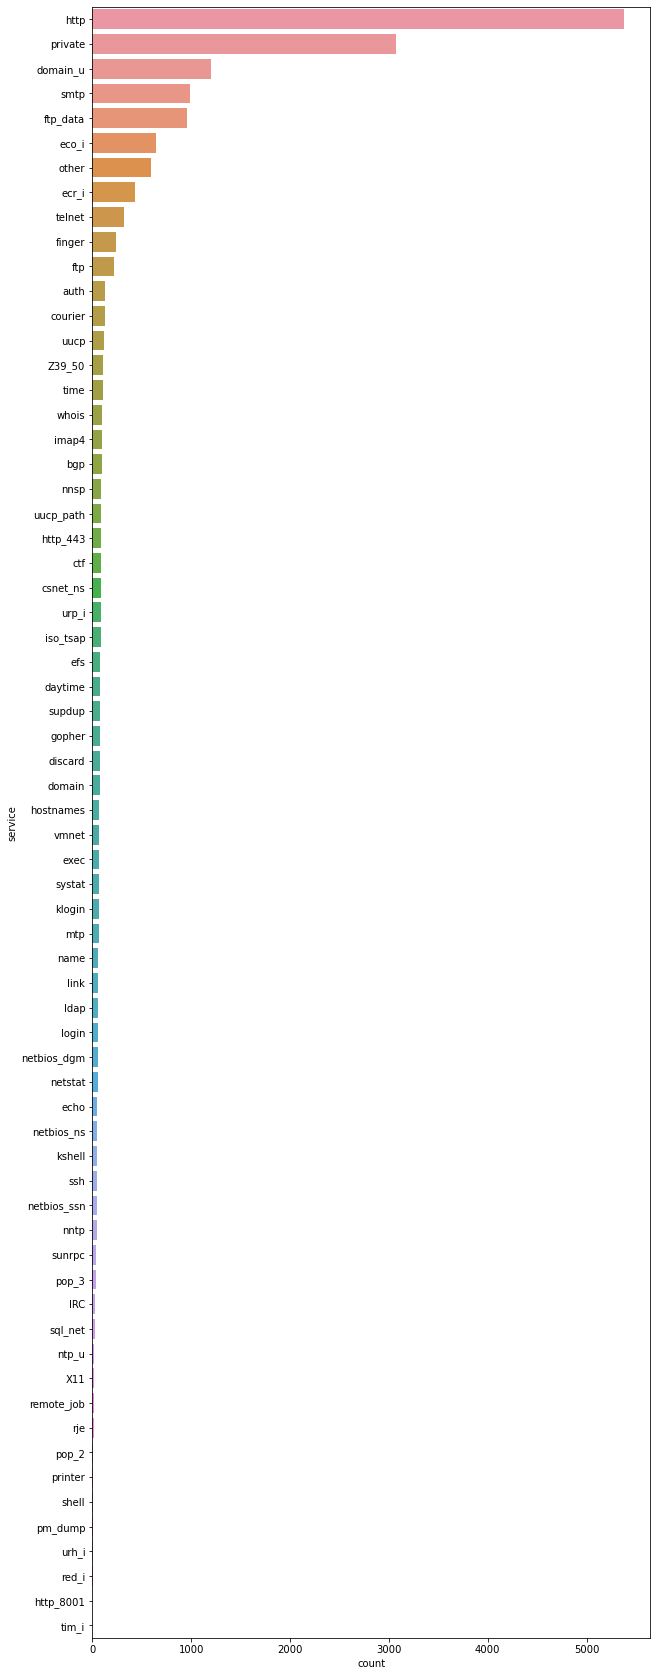

In [41]:
plt.figure(figsize=(10,30))
sns.countplot(data = Train_categorical, y = 'service', order = Train_categorical['service'].value_counts().index);

Visualize number of each connection status types appeared in connections

<AxesSubplot:xlabel='flag', ylabel='count'>

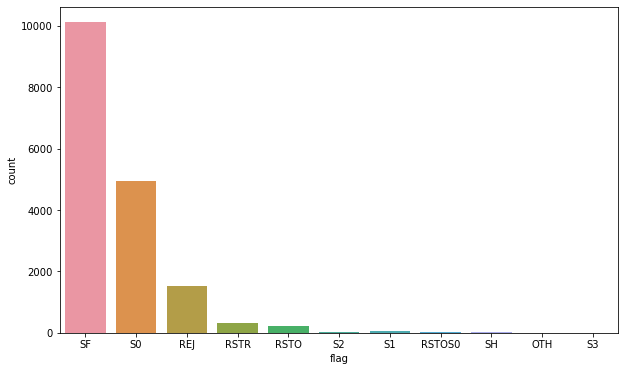

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data = Train, x = 'flag')

Visualize number of each connection status types appeared in in each connection type (0: not attacked, 1: attacked)

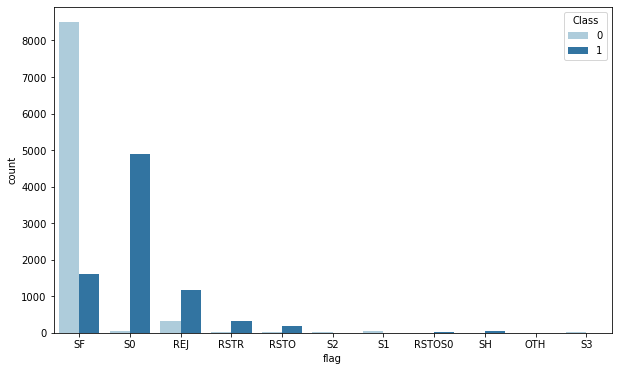

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data = Train, x = 'flag', hue = 'Class', palette = 'Paired').figure.get_axes()[0].legend(title='Class',loc='upper right');

## Data Encoding

We had to concat train & test data for encoding on all data (train & test) to avoid inconsistent columns number because of some columns has unique values in train data more than that in test data

In [44]:
Train

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp      smtp    SF       1129        327     0   
1             0           tcp      http    SF        242       2147     0   
2             0           tcp      http    SF        299       3991     0   
3             0           udp  domain_u    SF         43        133     0   
4             0           tcp    telnet    S0          0          0     0   
...         ...           ...       ...   ...        ...        ...   ...   
17246         0           tcp      http    SF        162      19994     0   
17247         0           udp  domain_u    SF         44         80     0   
17248         3           tcp      smtp    SF        705        329     0   
17249         0           tcp    Z39_50    S0          0          0     0   
17250     35240           tcp   private  RSTR          1          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                   0       0    0  ...                    1.00   
1                   0       0    0  ...                    1.00   
2                   0       0    0  ...                    1.00   
3                   0       0    0  ...                    1.00   
4                   0       0    0  ...                    0.14   
...               ...     ...  ...  ...                     ...   
17246               0       0    0  ...                    1.00   
17247               0       0    0  ...                    1.00   
17248               0       0    0  ...                    0.72   
17249               0       0    0  ...                    0.09   
17250               0       0    0  ...                    0.01   

       dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                        0.00                         0.14   
1                        0.00                         0.00   
2                        0.00                         0.00   
3                        0.01                         0.00   
4                        0.19                         0.05   
...                       ...                          ...   
17246                    0.00                         0.07   
17247                    0.01                         0.00   
17248                    0.06                         0.01   
17249                    0.06                         0.00   
17250                    0.58                         1.00   

       dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                             0.02                  0.00   
1                             0.00                  0.00   
2                             0.00                  0.00   
3                             0.00                  0.00   
4                             0.00                  0.10   
...                            ...                   ...   
17246                         0.04                  0.07   
17247                         0.00                  0.00   
17248                         0.01                  0.00   
17249                         0.00                  1.00   
17250                         0.00                  0.00   

       dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                          0.04                   0.0   
1                          0.00                   0.0   
2                          0.00                   0.0   
3                          0.00                   0.0   
4                          0.67                   0.0   
...                         ...                   ...   
17246                      0.00                   0.0   
17247                      0.00                   0.0   
17248                      0.00                   0.0   
17249                      1.00                   0.0   
17250                      0.00                   1.0   

       dst_host_srv_rerror_rate  level  Class  
0                          0.01     21      0  
1                          0.0

In [45]:
Test

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0            0           tcp      http  REJ          0          0     0   
1            0           tcp  ftp_data   SF        151          0     0   
2            0           udp  domain_u   SF         44        139     0   
3            0           tcp      http   SF        251       4014     0   
4            0           tcp      smtp   SF       1317        367     0   
...        ...           ...       ...  ...        ...        ...   ...   
5746         0           tcp   private   S0          0          0     0   
5747         0           tcp      smtp   SF       2315        328     0   
5748         0           tcp      http   S0          0          0     0   
5749         0           tcp      http   SF        191      24802     0   
5750         0           tcp    supdup   S0          0          0     0   

      wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                  0       0    0  ...                 236   
1                  0       0    0  ...                  37   
2                  0       0    0  ...                 255   
3                  0       0    0  ...                 255   
4                  0       0    0  ...                 166   
...              ...     ...  ...  ...                 ...   
5746               0       0    0  ...                  22   
5747               0       0    0  ...                 121   
5748               0       0    0  ...                  25   
5749               0       0    0  ...                 255   
5750               0       0    0  ...                  15   

      dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                       1.00                    0.00   
1                       0.33                    0.07   
2                       1.00                    0.00   
3                       1.00                    0.00   
4                       0.80                    0.40   
...                      ...                     ...   
5746                    0.09                    0.05   
5747                    0.43                    0.02   
5748                    0.10                    0.05   
5749                    1.00                    0.00   
5750                    0.06                    0.08   

      dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                            0.09                         0.01   
1                            0.33                         0.05   
2                            0.00                         0.00   
3                            0.00                         0.01   
4                            0.20                         0.02   
...                           ...                          ...   
5746                         0.00                         0.00   
5747                         0.01                         0.02   
5748                         0.00                         0.00   
5749                         0.00                         0.00   
5750                         0.00                         0.00   

      dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                      0.0                       0.0                   1.0   
1                      0.0                       0.0                   0.0   
2                      0.0                       0.0                   0.0   
3                      0.0                       0.0                   0.0   
4                      0.0                       0.0                   0.0   
...                    ...                       ...                   ...   
5746                   1.0                       1.0                   0.0   
5747                   0.0                       0.0                   0.0   
5748                   1.0                       1.0                   0.0   
5749                   0.0                       0.0                   0.0   
5750                   1.0          

This column for identify train and test for sepearte them again 

In [46]:
Train['train'] = 1
Test['train'] = 0

In [47]:
data = pd.concat([Train,Test],ignore_index=True)

In [48]:
data = pd.get_dummies(data, columns = ['protocol_type','service','flag'])

Notice that there is now Class column for all train & test and original test data has not class labels 

In [49]:
data.Class

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22997    NaN
22998    NaN
22999    NaN
23000    NaN
23001    NaN
Name: Class, Length: 23002, dtype: float64

In [50]:
data['train']

0        1
1        1
2        1
3        1
4        1
        ..
22997    0
22998    0
22999    0
23000    0
23001    0
Name: train, Length: 23002, dtype: int64

So, here we identify train & test from each other and seperate them again to there original data files <br>
Also, drop uneeded train identifier column we create

In [51]:
Train = data[data['train'] == 1]
Test = data[data['train'] == 0]
Train.drop(['train'], axis = 1, inplace = True)
Test.drop(['train'], axis = 1, inplace = True)

We should also drop nan values Class column appear after conactenation of train & test data

In [52]:
Test.drop(['Class'], axis = 1, inplace = True)

**Correlation Heatmap**

In [53]:
Train

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0             0       1129        327     0               0       0    0   
1             0        242       2147     0               0       0    0   
2             0        299       3991     0               0       0    0   
3             0         43        133     0               0       0    0   
4             0          0          0     0               0       0    0   
...         ...        ...        ...   ...             ...     ...  ...   
17246         0        162      19994     0               0       0    0   
17247         0         44         80     0               0       0    0   
17248         3        705        329     0               0       0    0   
17249         0          0          0     0               0       0    0   
17250     35240          1          0     0               0       0    0   

       num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0                      0          1                0  ...         0   
1                      0          1                0  ...         0   
2                      0          1                0  ...         0   
3                      0          0                0  ...         0   
4                      0          0                0  ...         0   
...                  ...        ...              ...  ...       ...   
17246                  0          1                0  ...         0   
17247                  0          0                0  ...         0   
17248                  0          1                0  ...         0   
17249                  0          0                0  ...         0   
17250                  0          0                0  ...         0   

       flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  \
0              0            0          0        0        0        0        0   
1              0            0          0        0        0        0        0   
2              0            0          0        0        0        0        0   
3              0            0          0        0        0        0        0   
4              0            0          0        1        0        0        0   
...          ...          ...        ...      ...      ...      ...      ...   
17246          0            0          0        0        0        0        0   
17247          0            0          0        0        0        0        0   
17248          0            0          0        0        0        0        0   
17249          0            0          0        1        0        0        0   
17250          0            0          1        0        0        0        0   

       flag_SF  flag_SH  
0            1        0  
1            1        0  
2            1        0  
3            1        0  
4            0        0  
...        ...      ...  
17246        1        0  
17247        1        0  
17248        1        0  
17249        0        0  
17250        0        0  

[17251 rows x 118 columns]

In [54]:
Test

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
17251         0          0          0     0               0       0    0   
17252         0        151          0     0               0       0    0   
17253         0         44        139     0               0       0    0   
17254         0        251       4014     0               0       0    0   
17255         0       1317        367     0               0       0    0   
...         ...        ...        ...   ...             ...     ...  ...   
22997         0          0          0     0               0       0    0   
22998         0       2315        328     0               0       0    0   
22999         0          0          0     0               0       0    0   
23000         0        191      24802     0               0       0    0   
23001         0          0          0     0               0       0    0   

       num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
17251                  0          0                0  ...         1   
17252                  0          0                0  ...         0   
17253                  0          0                0  ...         0   
17254                  0          1                0  ...         0   
17255                  0          1                0  ...         0   
...                  ...        ...              ...  ...       ...   
22997                  0          0                0  ...         0   
22998                  0          1                0  ...         0   
22999                  0          0                0  ...         0   
23000                  0          1                0  ...         0   
23001                  0          0                0  ...         0   

       flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  \
17251          0            0          0        0        0        0        0   
17252          0            0          0        0        0        0        0   
17253          0            0          0        0        0        0        0   
17254          0            0          0        0        0        0        0   
17255          0            0          0        0        0        0        0   
...          ...          ...        ...      ...      ...      ...      ...   
22997          0            0          0        1        0        0        0   
22998          0            0          0        0        0        0        0   
22999          0            0          0        1        0        0        0   
23000          0            0          0        0        0        0        0   
23001          0            0          0        1        0        0        0   

       flag_SF  flag_SH  
17251        0        0  
17252        1        0  
17253        1        0  
17254        1        0  
17255        1        0  
...        ...      ...  
22997        0        0  
22998        1        0  
22999        0        0  
23000        1        0  
23001        0        0  

[5751 rows x 117 columns]

<AxesSubplot:>

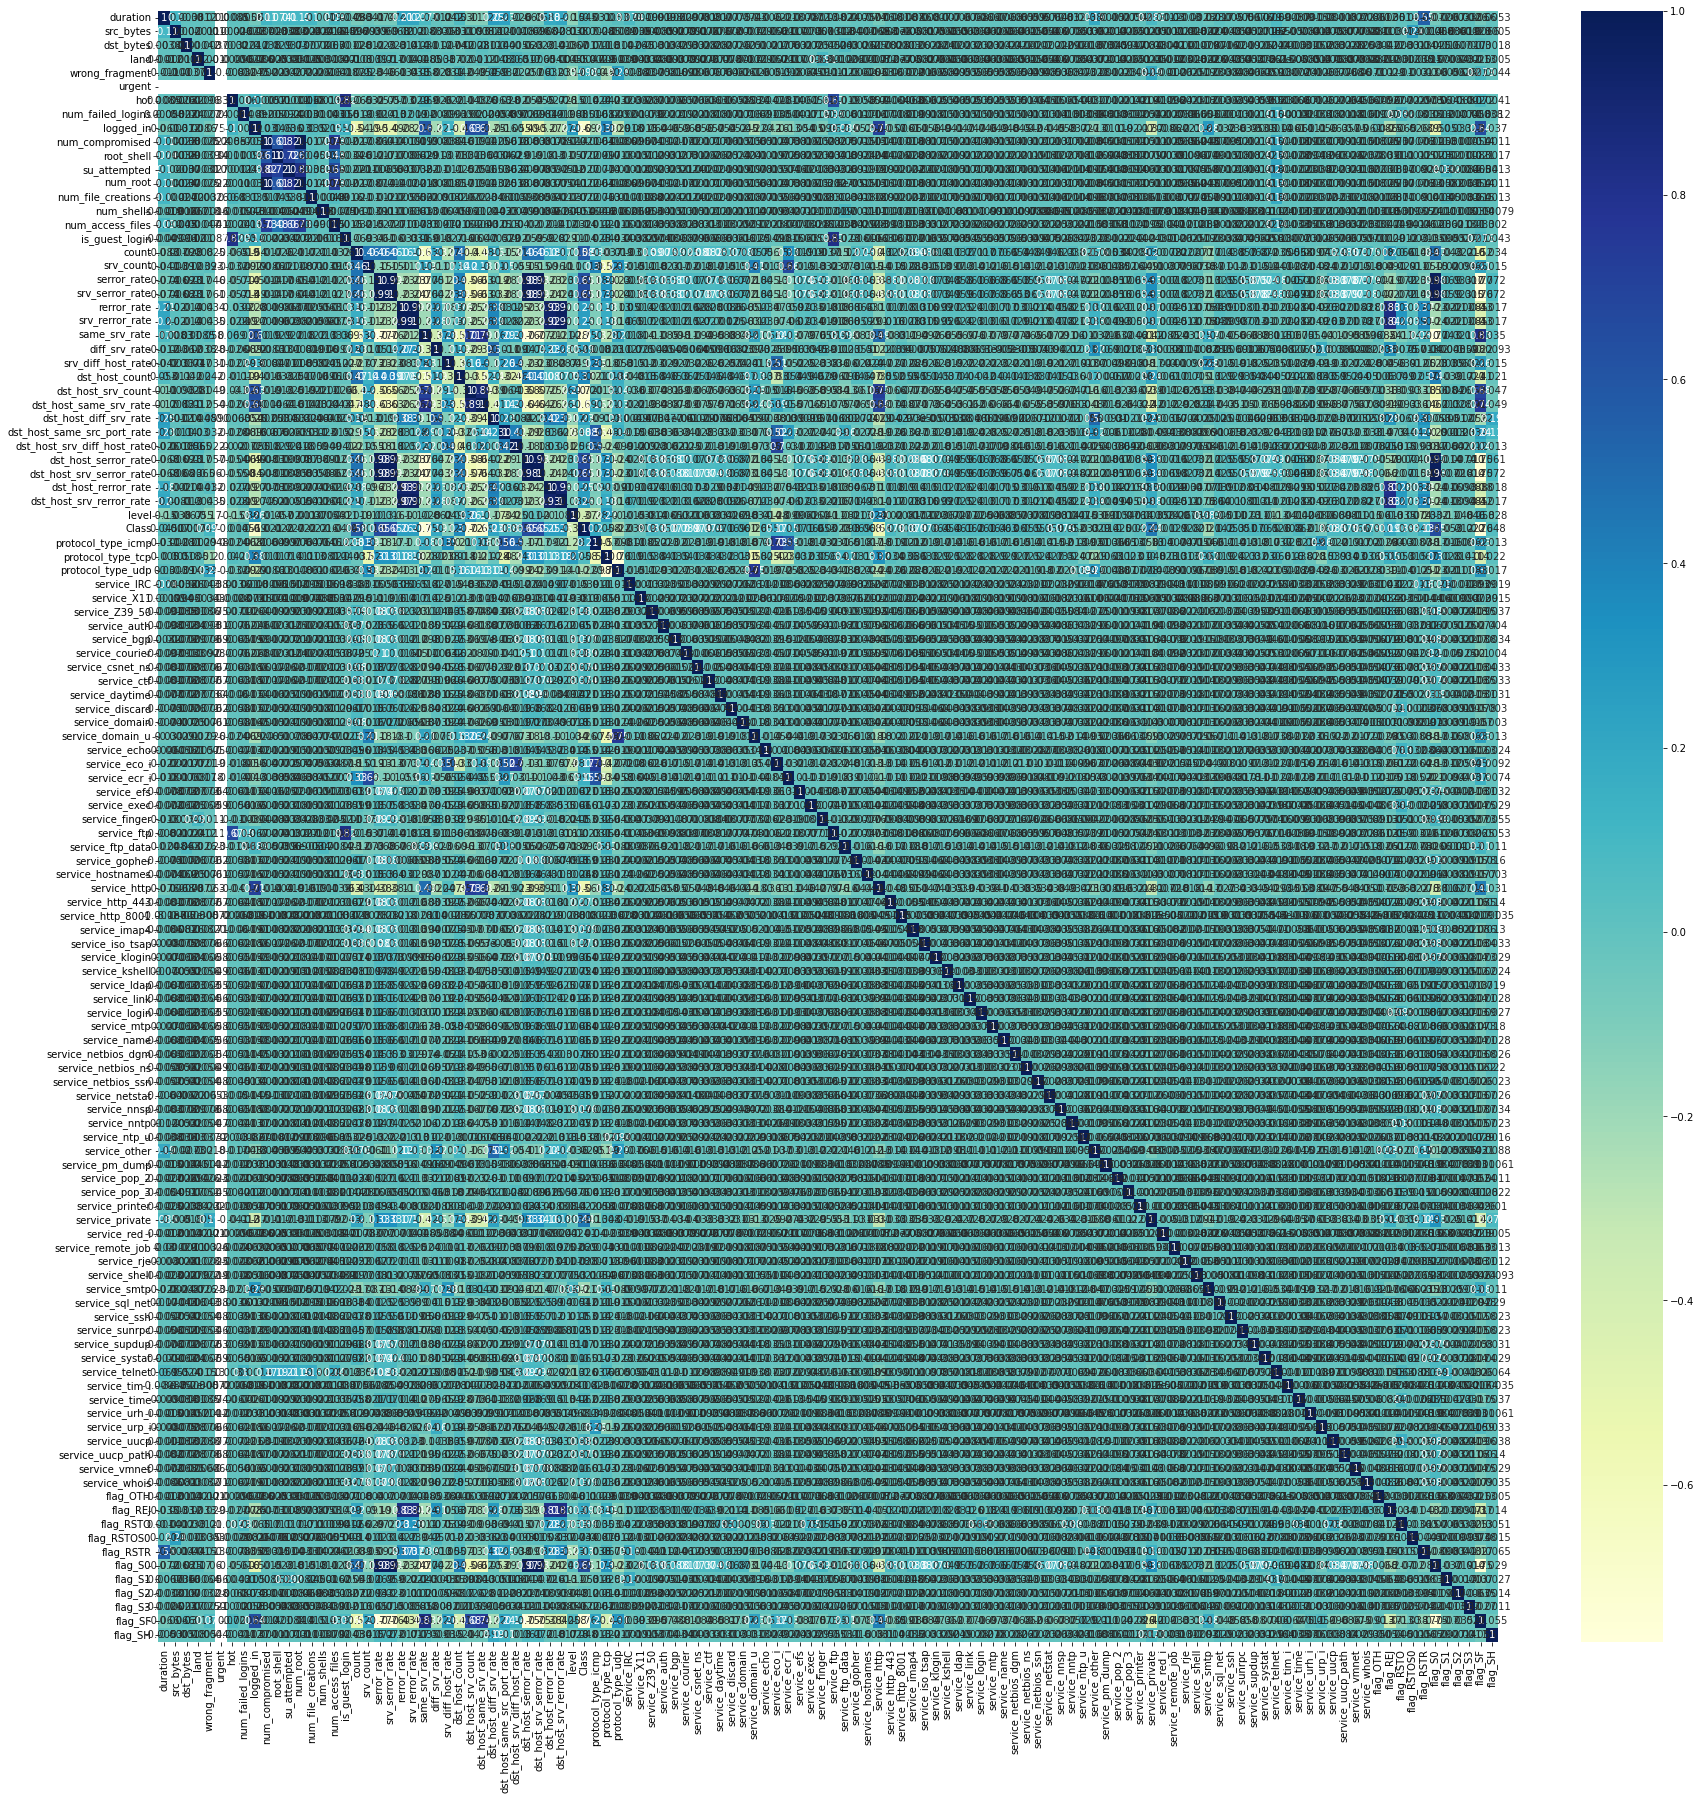

In [55]:
plt.figure(figsize=(30,30))
sns.heatmap(Train.corr(), annot= True,cmap='YlGnBu')

## Data Splitting

**Split Train data into train & test for model validation before final test on test data**

In [56]:
x_train = Train.drop('Class', axis = 1)
y_train = Train['Class'].values

In [57]:
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train, y_train, test_size = 0.2 , shuffle = True, stratify = y_train, random_state = 42)

**Shape after feature engineering**

In [58]:
Train.shape

(17251, 118)

In [59]:
Test.shape

(5751, 117)

## Data Scaling

In [60]:
scaler = MaxAbsScaler()
x_train_train_scaled = scaler.fit_transform(x_train_train) 
x_train_test_scaled = scaler.transform(x_train_test)

## Resampling

In [61]:
print('Original dataset shape %s' % Counter(y_train_train))

Original dataset shape Counter({0.0: 7200, 1.0: 6600})


In [62]:
smote_tomek = SMOTETomek(random_state = 42)
x_train_train_resampled, y_train_train_resampled = smote_tomek.fit_resample(x_train_train, y_train_train)

In [63]:
print('Resampled (Oversampled) dataset shape %s' % Counter(y_train_train_resampled))

Resampled (Oversampled) dataset shape Counter({1.0: 7184, 0.0: 7184})


**Final Data Shape**

In [64]:
x_train_train_resampled.shape

(14368, 117)

In [65]:
x_train_test_scaled.shape

(3451, 117)

**Note:**<br>

We Use encoding, Scaling, Resampling methods for data engineering, but we don't use feature selection as we notice from trying it that all features are important and trying also pca and found it is not useful for this data as the data variables are uncorrelated

# Training Model
**Validation Phase**

## Random Forest

In [66]:
# time now
start = dt.now()

In [67]:
RF = RandomForestClassifier(random_state = 42)
# fitting
RF.fit(x_train_train_resampled,y_train_train_resampled)
# estimating runtime
running_secs = (dt.now() - start).seconds
running_mins = running_secs / 60
print('Execution took: %s secs' % running_secs)
print('Execution took: %s mins' % running_mins)
# predicting
y_pred = RF.predict(x_train_test)

Execution took: 1 secs
Execution took: 0.016666666666666666 mins


In [68]:
importance = RF.feature_importances_

<AxesSubplot:>

<Figure size 1080x720 with 0 Axes>

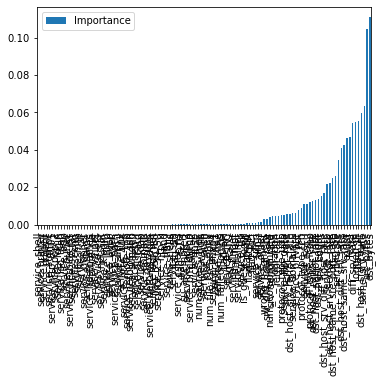

In [69]:
plt.figure(figsize=(15,10))
pd.DataFrame(importance, index = x_train.columns, columns=["Importance"]).sort_values(by='Importance'). plot(kind='bar')

In [70]:
print(classification_report(y_train_test, y_pred,digits = 3))

              precision    recall  f1-score   support

         0.0      0.998     0.997     0.998      1800
         1.0      0.997     0.998     0.998      1651

    accuracy                          0.998      3451
   macro avg      0.998     0.998     0.998      3451
weighted avg      0.998     0.998     0.998      3451



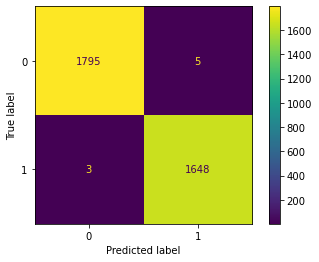

In [71]:
cm = confusion_matrix(y_train_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## XGBOOST

In [72]:
# time now
start = dt.now()

In [73]:
xgb = XGBClassifier(random_state = 42)
# fitting
xgb.fit(x_train_train_resampled, y_train_train_resampled)
# estimating runtime
running_secs = (dt.now() - start).seconds
running_mins = running_secs / 60
print('Execution took: %s secs' % running_secs)
print('Execution took: %s mins' % running_mins)
# predicting
y_pred = xgb.predict(x_train_test)

Execution took: 2 secs
Execution took: 0.03333333333333333 mins


In [74]:
xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)>

In [75]:
importance = xgb.feature_importances_

<AxesSubplot:>

<Figure size 1080x720 with 0 Axes>

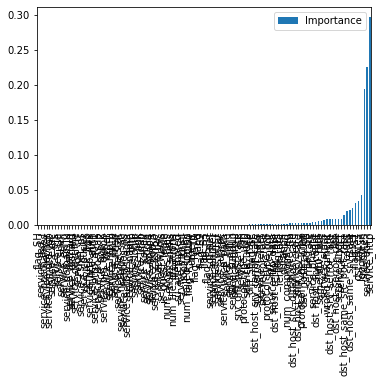

In [76]:
plt.figure(figsize=(15,10))
pd.DataFrame(importance, index = x_train.columns, columns=["Importance"]).sort_values(by='Importance'). plot(kind='bar')

In [77]:
print(classification_report(y_train_test, y_pred,digits = 3))

              precision    recall  f1-score   support

         0.0      0.999     0.997     0.998      1800
         1.0      0.996     0.999     0.998      1651

    accuracy                          0.998      3451
   macro avg      0.998     0.998     0.998      3451
weighted avg      0.998     0.998     0.998      3451



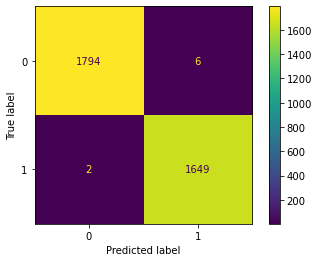

In [78]:
cm = confusion_matrix(y_train_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Hyperparameter Tuning

### Random Forest using Random Search

In [79]:
random_grid_params = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': np.arange(110,500,20)
              }

In [80]:
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid_params, scoring = 'f1', n_iter = 100, cv = 5, verbose=2, random_state = 42, n_jobs = -1)

In [81]:
# time now

start = dt.now()

In [82]:
# fitting
rf_random.fit(x_train_train_resampled, y_train_train_resampled)

# estimating runtime
running_secs = (dt.now() - start).seconds
running_mins = running_secs / 60

print('Execution took: %s secs' % running_secs)
print('Execution took: %s mins' % running_mins)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Execution took: 283 secs
Execution took: 4.716666666666667 mins


In [83]:
rf_random.best_params_

{'n_estimators': 190,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [84]:
best_rf = rf_random.best_estimator_

In [85]:
y_pred_best_rf = best_rf.predict(x_train_test)

In [86]:
best_rf.predict_proba(x_train_test)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.01578947, 0.98421053]])

In [87]:
print(classification_report(y_train_test, y_pred_best_rf,digits = 3))

              precision    recall  f1-score   support

         0.0      0.998     0.998     0.998      1800
         1.0      0.998     0.998     0.998      1651

    accuracy                          0.998      3451
   macro avg      0.998     0.998     0.998      3451
weighted avg      0.998     0.998     0.998      3451



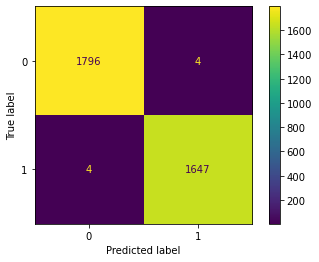

In [88]:
cm = confusion_matrix(y_train_test, y_pred_best_rf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### XGBOOST using Random Search

In [89]:
random_grid_params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [90]:
xbg_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid_params, scoring = 'f1', n_iter = 100, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)

In [91]:
# time now
start = dt.now()

In [92]:
xbg_random.fit(x_train_train_resampled, y_train_train_resampled)
# estimating runtime
running_secs = (dt.now() - start).seconds
running_mins = running_secs / 60

print('Execution took: %s secs' % running_secs)
print('Execution took: %s mins' % running_mins)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Execution took: 258 secs
Execution took: 4.3 mins


In [93]:
xbg_random.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [94]:
best_xgb = xbg_random.best_estimator_

In [95]:
y_pred_best_xgb = best_xgb.predict(x_train_test)

In [96]:
best_xgb.predict_proba(x_train_test)

array([[1.5735626e-05, 9.9998426e-01],
       [9.9997503e-01, 2.4984978e-05],
       [9.9994415e-01, 5.5856206e-05],
       ...,
       [9.9996066e-01, 3.9357372e-05],
       [9.9993616e-01, 6.3860069e-05],
       [1.4945269e-03, 9.9850547e-01]], dtype=float32)

In [97]:
print(classification_report(y_train_test, y_pred_best_xgb,digits = 3))

              precision    recall  f1-score   support

         0.0      0.998     0.999     0.999      1800
         1.0      0.999     0.998     0.998      1651

    accuracy                          0.999      3451
   macro avg      0.999     0.999     0.999      3451
weighted avg      0.999     0.999     0.999      3451



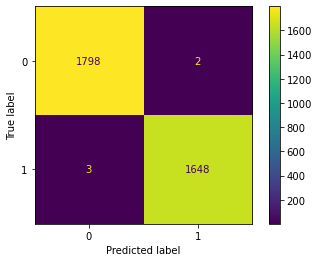

In [98]:
cm = confusion_matrix(y_train_test, y_pred_best_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Training Model
**FInal Phase**

**True Labels**

In [105]:
true_labels_test = pd.read_csv('test_labels.csv')

## Random Forest

**Using best Random Forest model obtained from hyperparamter tuning**

**Use x_train & y_train that obtained from Train file for final Training** 

**Use Test data file for final model test**

In [99]:
best_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, n_estimators=190, random_state=42)

In [100]:
rf_predictions = best_rf.predict(Test)

In [101]:
rf_prediction = pd.DataFrame(rf_predictions, columns=['predictions']).to_csv('rf_predictions.csv', index=False)

**Final Test using true labels and predictions**

In [108]:
print(classification_report(true_labels_test, rf_predictions,digits = 4))

              precision    recall  f1-score   support

           0     0.9990    0.9993    0.9992      3001
           1     0.9993    0.9989    0.9991      2750

    accuracy                         0.9991      5751
   macro avg     0.9991    0.9991    0.9991      5751
weighted avg     0.9991    0.9991    0.9991      5751



## XGBOOST

**Using best XGBOOST model obtained from hyperparamter tuning**

**Use x_train & y_train that obtained from Train file for final Training** 

**Use Test data file for final model test**

In [102]:
best_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [103]:
xgb_predictions = best_xgb.predict(Test)

In [104]:
xgb_prediction = pd.DataFrame(xgb_predictions, columns=['predictions']).to_csv('xgb_predictions.csv', index = False)

**Final Test using true labels and predictions**

In [107]:
print(classification_report(true_labels_test, xgb_predictions,digits = 4))

              precision    recall  f1-score   support

           0     0.9990    0.9987    0.9988      3001
           1     0.9985    0.9989    0.9987      2750

    accuracy                         0.9988      5751
   macro avg     0.9988    0.9988    0.9988      5751
weighted avg     0.9988    0.9988    0.9988      5751

